In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Needed to show the plots inline
%matplotlib inline
from sklearn.linear_model import Perceptron

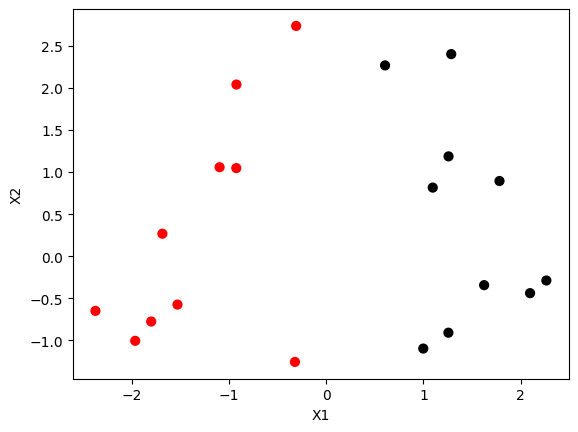

In [8]:
from sklearn.datasets import make_classification

# Generating the dataset
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, 
                           weights=[0.5, 0.5], random_state=2017)

# Plot the data
colormap = np.array(['red', 'black'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
clf = Perceptron(max_iter=100, verbose=0, random_state=2017, fit_intercept=True, eta0=0.002)
clf.fit(X,y)

Perceptron(eta0=0.002, max_iter=100, random_state=2017)

In [10]:
# Print the results
print ("Prediction: " + str(clf.predict(X)))
print ("Actual:     " + str(y))
print ("Accuracy:   " + str(clf.score(X, y)*100) + "%")

Prediction: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Actual:     [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Accuracy:   100.0%


In [11]:
# Output the values
print ("X1 Coefficient: " + str(clf.coef_[0,0]))
print ("X2 Coefficient: " + str(clf.coef_[0,1]))
print ("Intercept:      " + str(clf.intercept_))

X1 Coefficient: 0.0059220006267825375
X2 Coefficient: -0.0001843653761609775
Intercept:      [0.]


/tmp/ipykernel_24057/936288806.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


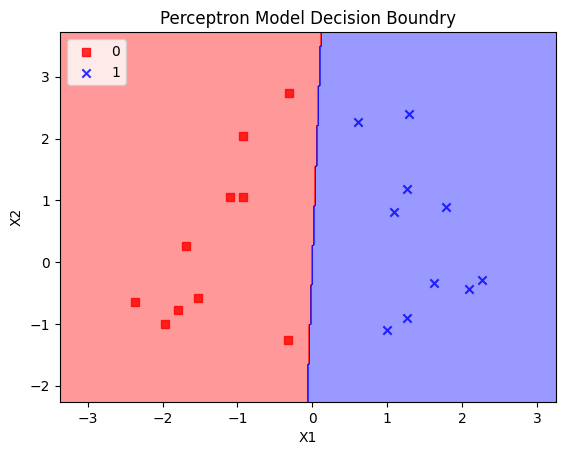

In [12]:
# Plot the decision boundary
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()